In [1]:
import time
notebookstart= time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import preprocessing
from contextlib import contextmanager
import keras as ks
from keras import backend as K
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as Tfidf
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords 
from scipy.cluster.vq import kmeans2, whiten
from sklearn.decomposition import PCA
# Viz

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input, Dropout, Dense, Embedding, SpatialDropout1D, concatenate


from numpy.random import seed
seed(666)
from tensorflow import set_random_seed
set_random_seed(666)

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print('[{' + name + '}] done in {' + str(round(time.time() - t0, 3)) + '} s')
    


Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML
import json
import altair as alt

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
train = reduce_mem_usage(pd.read_csv('input/train.csv.zip'))
test = reduce_mem_usage(pd.read_csv('input/test.csv.zip'))
mulliken = reduce_mem_usage(pd.read_csv('input/mulliken_charges.csv.zip'))
dipole = reduce_mem_usage(pd.read_csv('input/dipole_moments.csv.zip'))
structure = reduce_mem_usage(pd.read_csv('input/structures.csv.zip'))
potential = reduce_mem_usage(pd.read_csv('input/potential_energy.csv.zip'))
magnetic = reduce_mem_usage(pd.read_csv('input/magnetic_shielding_tensors.csv.zip'))
scaler = reduce_mem_usage(pd.read_csv('input/scalar_coupling_contributions.csv.zip'))
sub = reduce_mem_usage(pd.read_csv('input/sample_submission.csv.zip'))


Mem. usage decreased to 106.62 Mb (50.0% reduction)
Mem. usage decreased to 52.57 Mb (45.0% reduction)
Mem. usage decreased to 16.09 Mb (54.2% reduction)
Mem. usage decreased to  1.13 Mb (56.2% reduction)
Mem. usage decreased to 51.74 Mb (52.1% reduction)
Mem. usage decreased to  0.81 Mb (37.5% reduction)
Mem. usage decreased to 39.49 Mb (69.3% reduction)
Mem. usage decreased to 115.50 Mb (59.4% reduction)
Mem. usage decreased to 11.95 Mb (68.7% reduction)


In [5]:
train.head(10)

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   
5   5  dsgdb9nsd_000001             2             3  2JHH   
6   6  dsgdb9nsd_000001             2             4  2JHH   
7   7  dsgdb9nsd_000001             3             0  1JHC   
8   8  dsgdb9nsd_000001             3             4  2JHH   
9   9  dsgdb9nsd_000001             4             0  1JHC   

   scalar_coupling_constant  
0                84.8125000  
1               -11.2578125  
2               -11.2578125  
3               -11.2578125  
4                84.8125000  
5               -11.2578125  
6               -11.2578125  
7                84.8125000  
8               -11.2578125  
9                84.8125000

In [6]:
structure.head(10)

molecule_name  atom_index atom                  x                  y  \
0  dsgdb9nsd_000001           0    C -0.012695312500000  1.085937500000000   
1  dsgdb9nsd_000001           1    H  0.002149581909180 -0.006031036376953   
2  dsgdb9nsd_000001           2    H  1.011718750000000  1.463867187500000   
3  dsgdb9nsd_000001           3    H -0.541015625000000  1.447265625000000   
4  dsgdb9nsd_000001           4    H -0.523925781250000  1.437500000000000   
5  dsgdb9nsd_000002           0    N -0.040435791015625  1.024414062500000   
6  dsgdb9nsd_000002           1    H  0.017257690429688  0.012542724609375   
7  dsgdb9nsd_000002           2    H  0.916015625000000  1.358398437500000   
8  dsgdb9nsd_000002           3    H -0.520507812500000  1.343750000000000   
9  dsgdb9nsd_000003           0    O -0.034362792968750  0.977539062500000   

                   z  
0  0.008003234863281  
1  0.001976013183594  
2  0.000276565551758  
3 -0.876464843750000  
4  0.906250000000000  
5  0.062561035156250  
6 -0.027374267578125  
7 -0.028762817382812  
8 -0.775390625000000  
9  0.007602691650391

In [6]:
def map_atom_info(df, atom_idx):
    df = pd.merge(df, structure, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

test = map_atom_info(test, 0)
test = map_atom_info(test, 1)

In [7]:
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

In [8]:
train['dist'] = np.linalg.norm(train_p_0 - train_p_1, axis=1)
test['dist'] = np.linalg.norm(test_p_0 - test_p_1, axis=1)


In [9]:
train['dist_0'] = np.linalg.norm(train_p_0 + train_p_1, axis=1)
test['dist_0'] = np.linalg.norm(test_p_0 + test_p_1, axis=1)

train['dist_1'] = np.max(train_p_0 * train_p_1, axis=1)
test['dist_1'] = np.max(test_p_0 * test_p_1, axis=1)

train['dist_2'] = np.min(train_p_0 * train_p_1, axis=1)
test['dist_2'] = np.min(test_p_0 * test_p_1, axis=1)

train['dist_3'] = np.var(train_p_0 * train_p_1, axis=1)
test['dist_3'] = np.var(test_p_0 * test_p_1, axis=1)

In [10]:
train['c_0'] = train.groupby('molecule_name')['id'].transform('count')
test['c_0'] = test.groupby('molecule_name')['id'].transform('count')

train['c_1'] = train.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')
test['c_1'] = test.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')

train['c_2'] = train.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')
test['c_2'] = test.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')

train['c_3'] = train['c_2'] / train['c_1']
test['c_3'] = test['c_2'] / test['c_1']

train['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')
test['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')

train['d_0'] = np.max(np.abs(train_p_0 - train_p_1), axis=1)
test['d_0'] = np.max(np.abs(test_p_0 - test_p_1), axis=1)


In [11]:
train['ct_0'] = train.groupby(['molecule_name', 'atom_index_1', 'type'])['id'].transform('count')
test['ct_0'] = test.groupby(['molecule_name', 'atom_index_1', 'type'])['id'].transform('count')

train['ct_1'] = train.groupby(['molecule_name', 'atom_index_0', 'type'])['id'].transform('count')
test['ct_1'] = test.groupby(['molecule_name', 'atom_index_0', 'type'])['id'].transform('count')

train['ct_2'] = train.groupby(['molecule_name', 'type'])['id'].transform('count')
test['ct_2'] = test.groupby(['molecule_name', 'type'])['id'].transform('count')


In [12]:
train = train.merge(potential, on=['molecule_name'], how='left')
test = test.merge(potential, on=['molecule_name'], how='left')

In [7]:
y = train['scalar_coupling_constant']

In [8]:
train = pd.read_csv('train_0.csv', index_col=0)
test = pd.read_csv('test_0.csv', index_col=0)

In [9]:
np.unique(train['type'])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
def metric(df, preds):
    df["prediction"] = preds
    maes = []
    for t in df.type.unique():
        y_true = df[df.type==t].scalar_coupling_constant.values
        y_pred = df[df.type==t].prediction.values
        mae = np.log(metrics.mean_absolute_error(y_true, y_pred))
        maes.append(mae)
    return np.mean(maes)
#df for evaluate
eval_df = pd.DataFrame({"type": train["type"]})
eval_df["scalar_coupling_constant"] = y

In [11]:
train.head()

atom_index_0  atom_index_1  type  atom_index_x  atom_0      x_0      y_0  \
0             1             0     0             1       0  0.00215 -0.00603   
1             1             2     3             1       0  0.00215 -0.00603   
2             1             3     3             1       0  0.00215 -0.00603   
3             1             4     3             1       0  0.00215 -0.00603   
4             2             0     0             2       0  1.01200  1.46400   

         z_0  EN_x  rad_x             ...               \
0  0.0019760   2.2   0.43             ...                
1  0.0019760   2.2   0.43             ...                
2  0.0019760   2.2   0.43             ...                
3  0.0019760   2.2   0.43             ...                
4  0.0002766   2.2   0.43             ...                

   molecule_atom_1_dist_std_diff  molecule_type_0_dist_std  \
0                        -0.7680                0.00000674   
1                        -0.1764                0.00000410   
2                        -0.1764                0.00000410   
3                        -0.1764                0.00000410   
4                        -0.7680                0.00000674   

   molecule_type_0_dist_std_diff  molecule_type_dist_mean  \
0                        -0.7680                   0.7680   
1                        -0.1764                   0.1764   
2                        -0.1764                   0.1764   
3                        -0.1764                   0.1764   
4                        -0.7680                   0.7680   

   molecule_type_dist_mean_diff  molecule_type_dist_mean_div  \
0                    0.00000720                          1.0   
1                   -0.00000787                          1.0   
2                    0.00000036                          1.0   
3                    0.00000310                          1.0   
4                    0.00000420                          1.0   

   molecule_type_dist_max  molecule_type_dist_min  molecule_type_dist_std  \
0                  0.7680                  0.7680              0.00000674   
1                  0.1764                  0.1764              0.00000410   
2                  0.1764                  0.1764              0.00000410   
3                  0.1764                  0.1764              0.00000410   
4                  0.7680                  0.7680              0.00000674   

   molecule_type_dist_std_diff  
0                      -0.7680  
1                      -0.1764  
2                      -0.1764  
3                      -0.1764  
4                      -0.7680  

[5 rows x 83 columns]

In [12]:
train.shape

(4658147, 83)

In [13]:
from sklearn.preprocessing import StandardScaler

In [16]:
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
n_split = 5
kf = KFold(n_splits=n_split, random_state=666, shuffle=True)
    
for type_ in np.unique(train['type']):

    
    train_ = train[train['type'] == type_].replace([np.inf, -np.inf], np.nan).fillna(0)
    test_ = test[test['type'] == type_].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    train_index = train_.index
    test_index = test_.index
    
    y_ = y[train['type'] == type_]
    
    features = [c for c in train_.columns if c not in ['id', 'molecule_name', 'x_0', 'y_0', 'z_0',
                                                       'x_1', 'y_1', 'z_1', 'atom_index',
                                                       'type', 'scalar_coupling_constant',
                                                       'atom_0', 'atom_1']]
    scaler = StandardScaler()
    scaler.fit(pd.concat([train_[features], test_[features]]))
    x_tr = pd.DataFrame(scaler.transform(train_[features]))
    x_te = pd.DataFrame(scaler.transform(test_[features]))
                
    
    
    for i, (train_idx, valid_idx) in enumerate(kf.split(train_)):  
        print(f'Fold {i + 1}')
        x_train = x_tr
        y_train = y_
        
        config = tf.ConfigProto(intra_op_parallelism_threads=3,
                            use_per_session_threads=3, inter_op_parallelism_threads=3)
        with tf.Session(graph=tf.Graph(), config=config) as sess, timer('fit_predict'):
                ks.backend.set_session(sess)
                with tf.device('/gpu:0'):
                        model_in = ks.Input(shape=(x_train.shape[1],), dtype='float32', sparse=False)
                        out = ks.layers.Dense(2**10, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(model_in)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.5)(out)
                        out = ks.layers.Dense(2**9, activation='sigmoid', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.2)(out)
                        out = ks.layers.Dense(2**7, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.2)(out)
                        out =  ks.layers.Dense(2**6, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.Dense(1 , activation='linear', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.05, seed=666))(out)
                        model = ks.models.Model(model_in, out)
                        model.compile(loss='mean_absolute_error',
                                      optimizer=ks.optimizers.Adam(lr=2e-3),
                                      metrics=['mean_absolute_error'])
                        batch_size = 2 ** 8
                        for i in range(4):
                            with timer('pass ' +  str(i + 1)):
                                model.fit(x=x_train.iloc[train_idx], y=y_train.iloc[train_idx], batch_size=batch_size+(batch_size*(2*i)), epochs=2, 
                                    validation_data=(x_train.iloc[valid_idx], y_train.iloc[valid_idx]), callbacks=[], shuffle=True)
        
                        oof[train_index[valid_idx]] = model.predict(x_train.iloc[valid_idx]).reshape(1, -1)
                        predictions[test_index] += model.predict(x_te)[:, 0] / n_split

    
print("CV score: {:<8.5f}".format(metric(eval_df, oof)))

Fold 1
Train on 567532 samples, validate on 141884 samples
Epoch 1/2
567532/567532 [==============================] - 10s 17us/step - loss: 8.4415 - mean_absolute_error: 8.4415 - val_loss: 3.4876 - val_mean_absolute_error: 3.4876
Epoch 2/2
567532/567532 [==============================] - 9s 16us/step - loss: 5.2287 - mean_absolute_error: 5.2287 - val_loss: 3.3382 - val_mean_absolute_error: 3.3382
[{pass 1}] done in {20.016} s
Train on 567532 samples, validate on 141884 samples
Epoch 1/2
567532/567532 [==============================] - 4s 6us/step - loss: 4.5592 - mean_absolute_error: 4.5592 - val_loss: 2.8751 - val_mean_absolute_error: 2.8751
Epoch 2/2
567532/567532 [==============================] - 4s 6us/step - loss: 4.2931 - mean_absolute_error: 4.2931 - val_loss: 2.9622 - val_mean_absolute_error: 2.9622
[{pass 2}] done in {7.477} s
Train on 567532 samples, validate on 141884 samples
Epoch 1/2
567532/567532 [==============================] - 3s 5us/step - loss: 3.9975 - mean_absolu

567533/567533 [==============================] - 2s 4us/step - loss: 3.5139 - mean_absolute_error: 3.5139 - val_loss: 3.0298 - val_mean_absolute_error: 3.0298
Epoch 2/2
567533/567533 [==============================] - 2s 4us/step - loss: 3.3567 - mean_absolute_error: 3.3567 - val_loss: 2.7542 - val_mean_absolute_error: 2.7542
[{pass 4}] done in {4.673} s
[{fit_predict}] done in {48.092} s
Fold 1
Train on 34690 samples, validate on 8673 samples
Epoch 1/2
34690/34690 [==============================] - 1s 33us/step - loss: 15.9522 - mean_absolute_error: 15.9522 - val_loss: 6.8229 - val_mean_absolute_error: 6.8229
Epoch 2/2
34690/34690 [==============================] - 1s 16us/step - loss: 3.8675 - mean_absolute_error: 3.8675 - val_loss: 2.7891 - val_mean_absolute_error: 2.7891
[{pass 1}] done in {2.413} s
Train on 34690 samples, validate on 8673 samples
Epoch 1/2
34690/34690 [==============================] - 0s 6us/step - loss: 3.3412 - mean_absolute_error: 3.3412 - val_loss: 2.9764 - v

Epoch 2/2
34691/34691 [==============================] - 0s 5us/step - loss: 2.8514 - mean_absolute_error: 2.8514 - val_loss: 2.6589 - val_mean_absolute_error: 2.6589
[{pass 3}] done in {0.325} s
Train on 34691 samples, validate on 8672 samples
Epoch 1/2
34691/34691 [==============================] - 0s 4us/step - loss: 2.8575 - mean_absolute_error: 2.8575 - val_loss: 2.4008 - val_mean_absolute_error: 2.4008
Epoch 2/2
34691/34691 [==============================] - 0s 4us/step - loss: 2.7795 - mean_absolute_error: 2.7795 - val_loss: 2.1510 - val_mean_absolute_error: 2.1510
[{pass 4}] done in {0.268} s
[{fit_predict}] done in {4.42} s
Fold 1
Train on 912539 samples, validate on 228135 samples
Epoch 1/2
912539/912539 [==============================] - 16s 17us/step - loss: 1.4632 - mean_absolute_error: 1.4632 - val_loss: 1.1888 - val_mean_absolute_error: 1.1888
Epoch 2/2
912539/912539 [==============================] - 15s 16us/step - loss: 1.2469 - mean_absolute_error: 1.2469 - val_loss:

912540/912540 [==============================] - 6s 6us/step - loss: 1.0956 - mean_absolute_error: 1.0956 - val_loss: 0.9514 - val_mean_absolute_error: 0.9514
[{pass 2}] done in {11.966} s
Train on 912540 samples, validate on 228134 samples
Epoch 1/2
912540/912540 [==============================] - 4s 5us/step - loss: 1.0552 - mean_absolute_error: 1.0552 - val_loss: 0.9181 - val_mean_absolute_error: 0.9181
Epoch 2/2
912540/912540 [==============================] - 4s 5us/step - loss: 1.0382 - mean_absolute_error: 1.0382 - val_loss: 0.8971 - val_mean_absolute_error: 0.8971
[{pass 3}] done in {8.757} s
Train on 912540 samples, validate on 228134 samples
Epoch 1/2
912540/912540 [==============================] - 4s 4us/step - loss: 1.0124 - mean_absolute_error: 1.0124 - val_loss: 0.8686 - val_mean_absolute_error: 0.8686
Epoch 2/2
912540/912540 [==============================] - 4s 4us/step - loss: 1.0006 - mean_absolute_error: 1.0006 - val_loss: 0.8659 - val_mean_absolute_error: 0.8659
[{

302429/302429 [==============================] - 5s 16us/step - loss: 0.8473 - mean_absolute_error: 0.8473 - val_loss: 0.6167 - val_mean_absolute_error: 0.6167
[{pass 1}] done in {11.25} s
Train on 302429 samples, validate on 75607 samples
Epoch 1/2
302429/302429 [==============================] - 2s 6us/step - loss: 0.7196 - mean_absolute_error: 0.7196 - val_loss: 0.5612 - val_mean_absolute_error: 0.5612
Epoch 2/2
302429/302429 [==============================] - 2s 6us/step - loss: 0.6769 - mean_absolute_error: 0.6769 - val_loss: 0.5557 - val_mean_absolute_error: 0.5557
[{pass 2}] done in {3.998} s
Train on 302429 samples, validate on 75607 samples
Epoch 1/2
302429/302429 [==============================] - 1s 5us/step - loss: 0.6347 - mean_absolute_error: 0.6347 - val_loss: 0.5594 - val_mean_absolute_error: 0.5594
Epoch 2/2
302429/302429 [==============================] - 1s 5us/step - loss: 0.6127 - mean_absolute_error: 0.6127 - val_loss: 0.5553 - val_mean_absolute_error: 0.5553
[{pa

[{fit_predict}] done in {9.347} s
Fold 5
Train on 95403 samples, validate on 23850 samples
Epoch 1/2
95403/95403 [==============================] - 2s 22us/step - loss: 1.1793 - mean_absolute_error: 1.1793 - val_loss: 0.7671 - val_mean_absolute_error: 0.7671
Epoch 2/2
95403/95403 [==============================] - 2s 16us/step - loss: 0.8052 - mean_absolute_error: 0.8052 - val_loss: 0.6190 - val_mean_absolute_error: 0.6190
[{pass 1}] done in {4.343} s
Train on 95403 samples, validate on 23850 samples
Epoch 1/2
95403/95403 [==============================] - 1s 7us/step - loss: 0.6829 - mean_absolute_error: 0.6829 - val_loss: 0.5458 - val_mean_absolute_error: 0.5458
Epoch 2/2
95403/95403 [==============================] - 1s 6us/step - loss: 0.6426 - mean_absolute_error: 0.6426 - val_loss: 0.5110 - val_mean_absolute_error: 0.5110
[{pass 2}] done in {1.261} s
Train on 95403 samples, validate on 23850 samples
Epoch 1/2
95403/95403 [==============================] - 0s 4us/step - loss: 0.60

[{pass 3}] done in {11.491} s
Train on 1208303 samples, validate on 302076 samples
Epoch 1/2
1208303/1208303 [==============================] - 5s 4us/step - loss: 1.0380 - mean_absolute_error: 1.0380 - val_loss: 0.9111 - val_mean_absolute_error: 0.9111
Epoch 2/2
1208303/1208303 [==============================] - 5s 4us/step - loss: 1.0288 - mean_absolute_error: 1.0288 - val_loss: 0.9031 - val_mean_absolute_error: 0.9031
[{pass 4}] done in {9.837} s
[{fit_predict}] done in {100.719} s
Fold 5
Train on 1208304 samples, validate on 302075 samples
Epoch 1/2
1208304/1208304 [==============================] - 20s 17us/step - loss: 1.4000 - mean_absolute_error: 1.4000 - val_loss: 1.1612 - val_mean_absolute_error: 1.1612
Epoch 2/2
1208304/1208304 [==============================] - 20s 16us/step - loss: 1.2385 - mean_absolute_error: 1.2385 - val_loss: 1.0810 - val_mean_absolute_error: 1.0810
[{pass 1}] done in {41.204} s
Train on 1208304 samples, validate on 302075 samples
Epoch 1/2
1208304/120

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f4fb90b7f98>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.
Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f4fb90b79e8>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/

Train on 472488 samples, validate on 118123 samples
Epoch 1/2
472488/472488 [==============================] - 8s 18us/step - loss: 1.0387 - mean_absolute_error: 1.0387 - val_loss: 0.7302 - val_mean_absolute_error: 0.7302
Epoch 2/2
472488/472488 [==============================] - 8s 16us/step - loss: 0.8335 - mean_absolute_error: 0.8335 - val_loss: 0.6814 - val_mean_absolute_error: 0.6814
[{pass 1}] done in {17.196} s
Train on 472488 samples, validate on 118123 samples
Epoch 1/2
472488/472488 [==============================] - 3s 7us/step - loss: 0.7327 - mean_absolute_error: 0.7327 - val_loss: 0.5949 - val_mean_absolute_error: 0.5949
Epoch 2/2
472488/472488 [==============================] - 3s 7us/step - loss: 0.7072 - mean_absolute_error: 0.7072 - val_loss: 0.5855 - val_mean_absolute_error: 0.5855
[{pass 2}] done in {6.341} s
Train on 472488 samples, validate on 118123 samples
Epoch 1/2
472488/472488 [==============================] - 2s 5us/step - loss: 0.6755 - mean_absolute_error

472489/472489 [==============================] - 2s 4us/step - loss: 0.6443 - mean_absolute_error: 0.6443 - val_loss: 0.5327 - val_mean_absolute_error: 0.5327
Epoch 2/2
472489/472489 [==============================] - 2s 4us/step - loss: 0.6356 - mean_absolute_error: 0.6356 - val_loss: 0.5416 - val_mean_absolute_error: 0.5416
[{pass 4}] done in {3.861} s
[{fit_predict}] done in {40.344} s
Fold 1
Train on 133132 samples, validate on 33283 samples
Epoch 1/2
133132/133132 [==============================] - 3s 21us/step - loss: 0.6288 - mean_absolute_error: 0.6288 - val_loss: 0.5040 - val_mean_absolute_error: 0.5040
Epoch 2/2
133132/133132 [==============================] - 2s 16us/step - loss: 0.5274 - mean_absolute_error: 0.5274 - val_loss: 0.4537 - val_mean_absolute_error: 0.4537
[{pass 1}] done in {5.643} s
Train on 133132 samples, validate on 33283 samples
Epoch 1/2
133132/133132 [==============================] - 1s 6us/step - loss: 0.4717 - mean_absolute_error: 0.4717 - val_loss: 0.

133132/133132 [==============================] - 1s 5us/step - loss: 0.4333 - mean_absolute_error: 0.4333 - val_loss: 0.3825 - val_mean_absolute_error: 0.3825
Epoch 2/2
133132/133132 [==============================] - 1s 5us/step - loss: 0.4311 - mean_absolute_error: 0.4311 - val_loss: 0.3781 - val_mean_absolute_error: 0.3781
[{pass 3}] done in {1.238} s
Train on 133132 samples, validate on 33283 samples
Epoch 1/2
133132/133132 [==============================] - 1s 4us/step - loss: 0.4254 - mean_absolute_error: 0.4254 - val_loss: 0.3683 - val_mean_absolute_error: 0.3683
Epoch 2/2
133132/133132 [==============================] - 1s 4us/step - loss: 0.4101 - mean_absolute_error: 0.4101 - val_loss: 0.3637 - val_mean_absolute_error: 0.3637
[{pass 4}] done in {1.038} s
[{fit_predict}] done in {12.382} s
CV score: -0.21667


In [17]:
predictions

array([ 10.74257934, 162.07622528,   0.29895277, ...,   8.11514401,
        11.10763919, 124.93665504])

In [18]:
test.shape

(2505542, 83)

In [19]:
sub = pd.read_csv('input/sample_submission.csv.zip')

In [20]:
sub.head()

id  scalar_coupling_constant
0  4658147                         0
1  4658148                         0
2  4658149                         0
3  4658150                         0
4  4658151                         0

In [21]:
sub.shape

(2505542, 2)

In [22]:
len(predictions)

2505542

In [23]:
sub['scalar_coupling_constant'] = predictions

sub.to_csv("submission-nn-v0.1.1.csv", index=False)

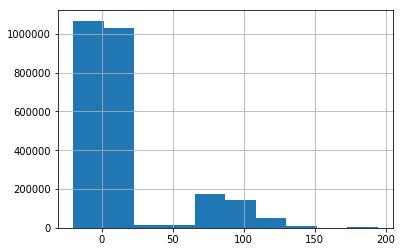

In [24]:
sub['scalar_coupling_constant'].hist()

In [25]:
pd.DataFrame(oof).to_csv('oofs/validation_nn_v0.1.1.csv', index=False)
pd.DataFrame(predictions).to_csv('oofs/test_nn_v0.1.1.csv', index=False)